In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("titanic.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

 # EDA PROCESS

In [4]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# impute the missing value for age
data["Age"].fillna(data["Age"].mean(),inplace=True)


In [6]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data.drop('Cabin',axis=1,inplace=True)


KeyError: "['Cabin'] not found in axis"

In [8]:
# i drop cabin 
#or 
# i dropna

data.drop('Cabin',axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
data=data.dropna()# remove the nan values


In [15]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Visualizalisation


C:\Users\Deepika Ajalkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

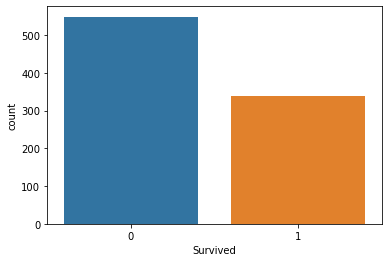

In [17]:
sns.countplot(data["Survived"])


In [19]:
data["Survived"].value_counts()


0    549
1    340
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

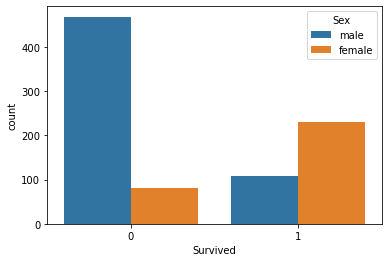

In [21]:
sns.countplot(x="Survived",hue="Sex",data=data)


In [23]:
data.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True) # unwanted columns


KeyError: "['Name' 'PassengerId' 'Ticket'] not found in axis"

In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [27]:
# Encoded the categorical value
sex=pd.get_dummies(data["Sex"],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [29]:
Embark=pd.get_dummies(data["Embarked"],drop_first=True)
Embark


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [32]:
data=pd.concat([data,sex,Embark],axis=1) # concat two columns
data.head()


,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
data.drop(["Sex","Embarked"],axis=1,inplace=True)
data.head(5)


KeyError: "['Sex' 'Embarked'] not found in axis"

# Building the Logistic Regression Model


In [33]:
from sklearn.model_selection import train_test_split
X=data.drop(["Survived"],axis=1)
y=data["Survived"]


In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=15)


In [37]:
# Build Logistic model

from sklearn.linear_model import LogisticRegression
LF=LogisticRegression()


In [39]:
LF.fit(xtrain,ytrain)
# testing my Training accuarcy
ypredtrain=LF.predict(xtrain)


C:\Users\Deepika Ajalkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.metrics import accuracy_score
print("Training accuracy")
print("------------")
print(accuracy_score(ytrain,ypredtrain))


Training accuracy
------------
0.8030942334739803


In [44]:
# Testing data
ypredtest=LF.predict(xtest)


In [46]:
print("Testing accuracy")
print("------------")
print(accuracy_score(ytest,ypredtest))


Testing accuracy
------------
0.8202247191011236
